In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 6]

In [2]:
def get_file_data(folder):
    data = {}
    for filename in os.listdir(folder):
        if filename.endswith(".csv") and ('progress_' in filename):
            df = pd.read_csv(folder + "/" + filename)
            data[os.path.splitext(filename)[0]] = df
            continue
        else:
            continue
    return data

In [3]:
DATA_DIR = '3rd-party/recurrent-neural-net/data/var'
dt = get_file_data(DATA_DIR)

In [4]:
l = sorted(dt)

In [5]:
def plot_relative_time(tanf, tanh, title):
    plt.rcParams['figure.figsize'] = [8, 6]
    fw = (tanh['FWtime'] - tanf['FWtime'])/tanh['FWtime']
    bw = (tanh['BWtime'] - tanf['BWtime'])/tanh['BWtime']
    plt.title(title)
    plt.ylabel("Time saving, %")
    plt.xlabel("Iterations, in 1000's")
    plt.plot(fw[4:]*100, label = "Forward")
    plt.plot(bw[4:]*100, label = "Backward")
    plt.legend()
    plt.show()
    
def plot_time_diff(tanf, tanh, title):
    plt.rcParams['figure.figsize'] = [8, 6]
    fw = (tanh['FWtime'] - tanf['FWtime'])
    bw = (tanh['BWtime'] - tanf['BWtime'])
    plt.title(title)
    plt.ylabel("Time saving, ms")
    plt.xlabel("Iterations, in 1000's")
    plt.plot(fw[4:]*100, label = "Forward")
    plt.plot(bw[4:]*100, label = "Backward")
    plt.legend()
    plt.show()

    
def plot_loss(tanf, tanh, title):
    plt.rcParams['figure.figsize'] = [8, 6]
    plt.title(title)
    plt.ylabel("Loss")
    plt.xlabel("Iterations, in 1000's")
    plt.plot(tanh['Loss'][4:], label = "Tanh")
    plt.plot(tanf['Loss'][4:], label = "Tanf")
    plt.legend()
    plt.show()
    
def print_time(s, tanf, tanh):
    t = tanh['FWtime'][-1:] - tanf['FWtime'][-1:]+ tanh['BWtime'][-1:] - tanf['BWtime'][-1:]
    print("Total Time savings for %s: %.3f seconds" % (s, t))

In [6]:
def get_data(l, i, dt):
    m = min([len(dt[l[i]]), len(dt[l[i+1]])])
    tf = dt[l[i]].truncate(after=(m-1))
    th = dt[l[i+1]].truncate(after=(m-1))
    #print_time(l[i], tf, th)
    return tf, th

In [7]:
i = 0
while i < len(l):
    (tf, th) = get_data(l, i, dt)
    i += 2

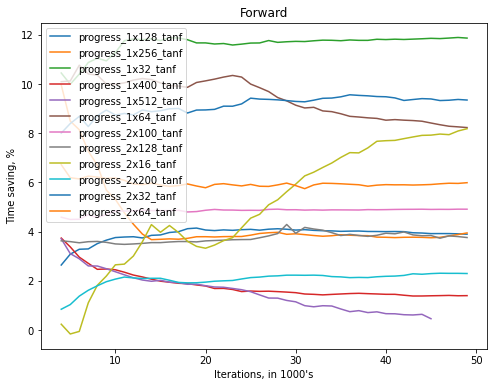

In [9]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.ylabel("Time saving, %")
plt.xlabel("Iterations, in 1000's")
plt.title("Forward")
i = 0
while i < len(l):
    (tanf, tanh) = get_data(l, i, dt)
    fw = (tanh['FWtime'] - tanf['FWtime'])/tanh['FWtime']
    # bw = (tanh['BWtime'] - tanf['BWtime'])/tanh['BWtime']
    plt.plot(fw[4:]*100, label = l[i])
    #plt.plot(bw[4:]*100, label = "Backward")
    i += 2
plt.legend()
plt.show()

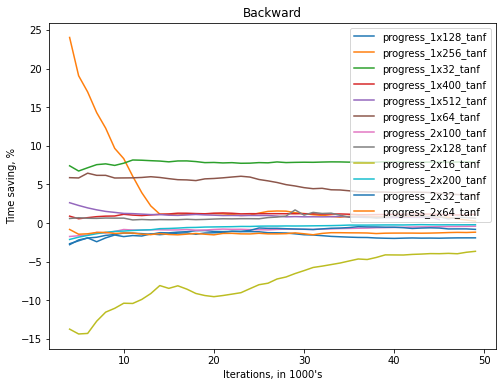

In [10]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.ylabel("Time saving, %")
plt.xlabel("Iterations, in 1000's")
plt.title("Backward")
i = 0
while i < len(l):
    (tanf, tanh) = get_data(l, i, dt)
    #fw = (tanh['FWtime'] - tanf['FWtime'])/tanh['FWtime']
    bw = (tanh['BWtime'] - tanf['BWtime'])/tanh['BWtime']
    #plt.plot(fw[4:]*100, label = "Forward" + str(i))
    plt.plot(bw[4:]*100, label = l[i])
    i += 2
plt.legend()
plt.show()

In [11]:
def plot_comparison_report(title, data1=None, data2=None):
    i = 0
    net = []
    val = []
    while i < len(l):
        (tanf, tanh) = get_data(l, i, dt)
        s = 0
        if data1 is not None:
            fw = (tanh[data1] - tanf[data1])/tanh[data1]
            s += fw.sum()
        if data2 is not None:
            bw = (tanh[data2] - tanf[data2])/tanh[data2]
            s += bw.sum()
        s = s/len(fw)
        net.append(l[i])
        val.append(s*100)
        i += 2
    plt.title(title)
    plt.xticks(rotation='vertical')
    plt.ylabel("Time saving, %")
    plt.bar(net, val)
    plt.show()

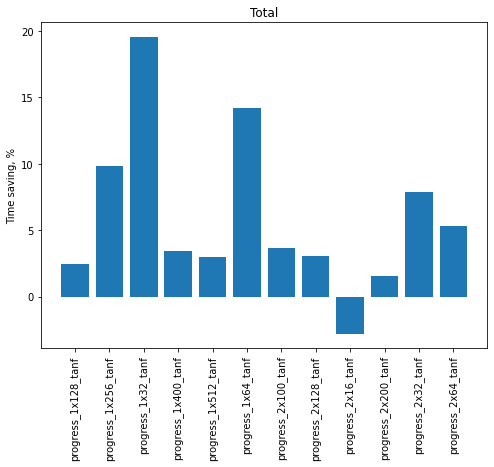

In [12]:
plot_comparison_report('Total', 'FWtime', 'BWtime')

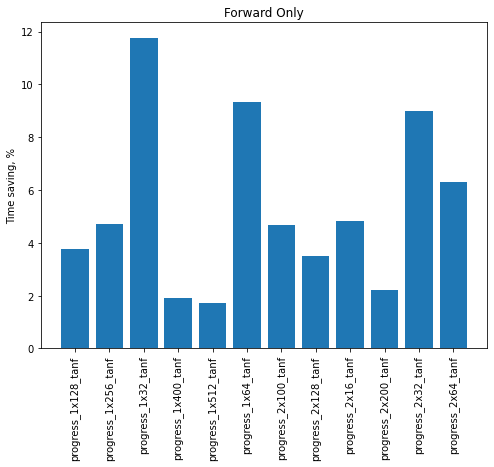

In [13]:
plot_comparison_report('Forward Only', 'FWtime')